# End to End Machine Learning Project

In this project we will go through an example project end to end, pretending to be a recently hired data scientist in a real estate company.Here are the main steps we will go through:
<ul>
<li>Look at the big picture.</li>
<li>Get the data.</li>
<li>Discover and visualize the data to gain insights.</li>
<li>Prepare the data for Machine Learning algorithms.</li>
<li>Select a model and train it.</li>
<li>Fine-tune your model.</li>
<li>Present your solution.</li>
<li>Launch, monitor, and maintain your system.</li>
</ul>

This notes are based on excellent book - [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron.

Aurélien offers a checklist of eight mains steps for any Machine Learning Project which can be adapted as we need. This helps in streamlining the project and avoid rework. Let's put them in special format, so we can use it as flash card.

<div class="alert alert-block alert-warning" id='anki_front'>
What are the eight main steps of a machine learning project?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
<ol>
<li>Frame the problem and understand the big picture.</li>
<li>Get the data.</li>
<li>Explore the data to gain initial insights.</li>
<li>Prepare and clean the data to better expose underlying patterns to Machine Learning algorithms.</li>
<li>Explore the different models/approaches and shortlist the most promising ones.</li>
<li>Fine-tune the models and combine them if possible for a better solution.</li>
<li>Present your solution.</li>
<li>Launch, monitor and maintain your solution.</li>
</ol>
</div>

In this project, we are going to follow these steps (more or less, as this is just beginning, we might not have all the context, or some step might be very trivial). Let's say at your job, you are given California Census Data to predict median housing price for each block group in California (districts, which typically has population of 600 to 3000).  The data contains various metrices such as population, median income, and median housing prices etc. Let's try to follow the steps above to solve this problem.

## 1. Frame the problem and understand the big picture

Whenever we start a Machine Learning project, it is better to ask the right questions and look at the big picture before we begin. There are many questions you can ask to get a bigger picture. These questions will help you make better choices down the line.

<div class="alert alert-block alert-warning" id='anki_front'>
What questions should be asked for understanding the big picture of your project?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
<ol>
    <li>What is the business objective of this project?</li>
    <li>What are the current solutions around?</li>
    <li>How will the solution be used?</li>
    <li>What kind of Machine Learning task it? Supervised/Unsupervised. Online/Batch etc</li>
    <li>How should the performance be measured?</li>
    <li>What is the minimum performance needed to reach business objective?</li>
    <li>What exisiting problems are similar to this one? Can we reuse tools, models or experience?</li>
    <li>Is the human expertise available?</li>
    <li>What assumptions are we making? Can we verify them?</li>
    <li>How would you solve the problem manually?</li>
</ol>
</div>

Let's answer as many questions as possible for our problem.

**Business Objective:** The end goal of the project determines how we plan, build and evaluate the model. It should be very clear why we are building the solution? Let's say our model's output will be input to another ML system which along with our output takes many other signals to determine if it is worth investing in an area or not. This is a typical machine learning pipeline.

**Current Solutions:** What if there are already state of art solutions available for this problem? In that case, why re-invent the wheel? It is good idea to gauge performance and architecture of the existing systems. This gives you reference for approaching the problem. Your boss tells you the current process is manual and have error variation of around 20%. In such case, you will like to get your hands dirty.

**Describing the task**: Now, we are designing the system.
* Is it a supervised, unsupervised or Reinforcement learning task? Supervised, as we have labeled training examples.
* Is it a classification, regression or something else? Is is regression as we are going to predict a value.
* Should we use online or batch learning? As there is no continuous data flow coming into the system, there is no requirement to adjust the data rapidly, and the data is small, so we will rely on plain batch learning.

**Measuring the performance**: Now, we have to select how do we measure performance of our model. In general, literature will always help you. Performance measure of regression is usually **Root Mean Square Error** (*RMSE*).
We will come back to this in detail soon. <font color='blue'>Tag: TBD</font>
   
**Assumption Check**: We need to list out our and other peoples' assumptions, even the smaller ones to catch the issue early on. For example in this project, We are assuming that we need to give district's median housing prices in the area. This will be a value i.e. a regression problem. However, what if downstream pipline expects a categorical value (e.g. district categorized as high, medium and low for housing price), in that case it will be a classification problem. You confirmed that the stackholders are indeed expecting a value back.

**Get the data**: Okay, we are now ready to get the data. Let's fetch the data. The author has modified the California Census data to fit the purpose of this project, and also graciously provided the code. I have modified the code a bit! Just to code it on my own.

In [1]:
import os
import tarfile
import requests

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    response = requests.get(housing_url)
    open(tgz_path, 'wb').write(response.content)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

**Load the data**: Awesome! We got the data, now, let's load this into a `pandas DataFrame` and do some quick explorations. 

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing_df = load_housing_data()
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Pretty cool! Here each row represents one district. There are 10 columns/attributes this data. Let's see those.

In [3]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Let's get more information about this `DataFrame` using the `info()` method.

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All right, we have 20639 rows in total. All the types except one `ocean_proximity` are numerical  `float64`. `ocean_proximity` column is `object` type which is a string categorical value. Let's see what categories it has, and how many districts are in those categories using `value_counts` method.

In [5]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Awesome, I am guessing those 5 ISLAND districts will be our outliers. Now, Let's get description for numerical columns. We can use `describe` method for it. It gives a summary of all the numerical attributes.

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


As you can see it describes the data using mean, standard deviation, and various quartiles. It ignores the null values. Look at number of total_bedrooms is 20433. It can be also observed in `info`. 
<div class="alert alert-block alert-warning" id='anki_front'>
How do you describe the categorical attributes of a pandas dataframe?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
Using <code>DataFrame[columnName].value_counts()</code>
</div>

<div class="alert alert-block alert-warning" id='anki_front'>
How do you describe the numerical attributes of a pandas dataframe?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
Using <code>DataFrame.describe()</code>
</div>

To get more feel for the data, let's plot it.

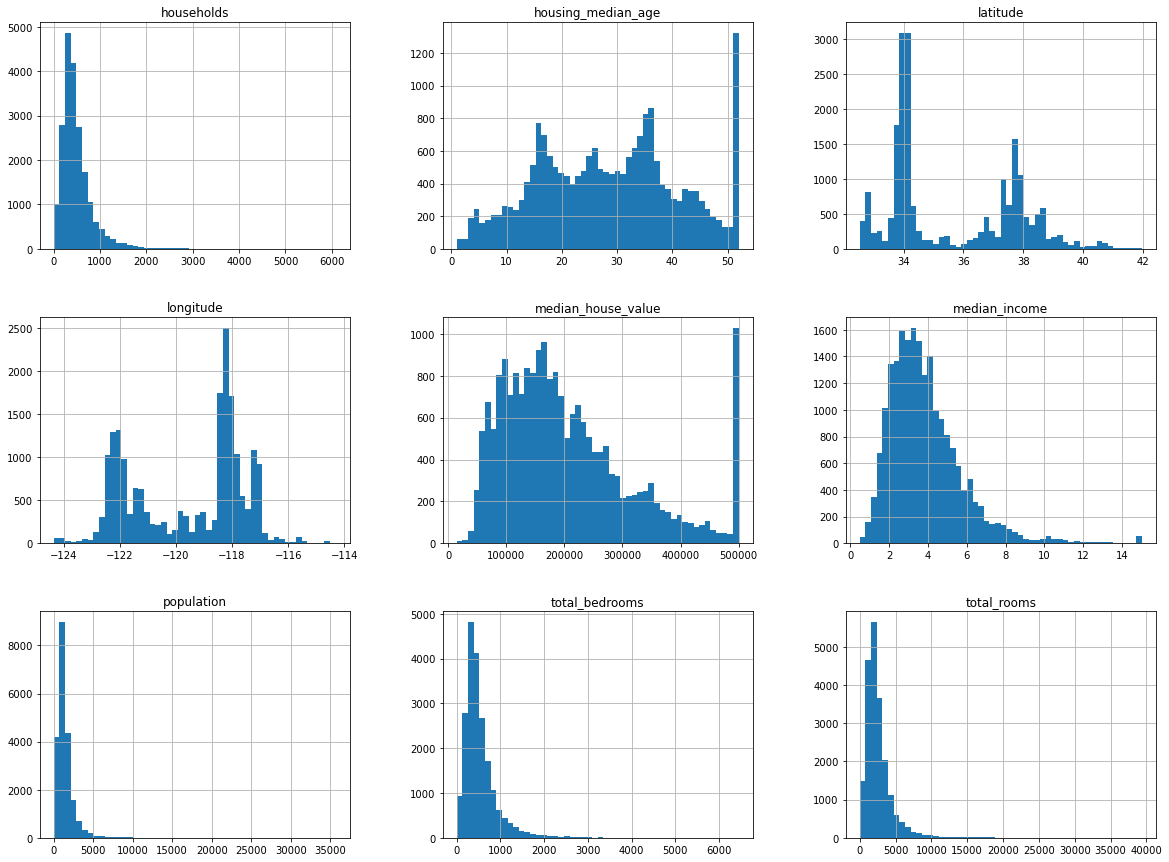

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

Let's analyze these histograms.

1. The median income graph looks fishy. It seems we are not representing the income in true US dollars. On confiming you get information that the median income has been downscaled and capped at 15 for higher median incomes and 0.5 for lower median incomes. The numbers represents rougly tens of thousand. So 10 here means 10,000 dollars.
2. The housing median values seems to be capped too, and apparently so is housing median age. The housing median value is our target label, so it seems we will not able to accurately make predictions beyond 500,000 as our algorithm will never see larger values than that. Ideally, you should bring this up to your team and boss, so you know where algorithm might not work well. May be better data need to be collected.
3. All these attributes are at very different scale. We will come to feature scaling in future.
4. We also might need to transform these attributes later, as the distribution right now are tail-heavy, ie.e they extend much more to the right than to the left.

### Performance Measurement

As mentioned above we will use Root Mean Squared Error (RMSE) to measure performance of our model. 

<div class="alert alert-block alert-warning" id='anki_front'>
    The mathematical formala for <b>RMSE</b> is 

<p style="text-align: center;">
    RMSE(<b>X</b>, <i>h</i>) = $\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)} - y^{(i)})^2}$
</p>

Let's understand the notations and what each variable represent here.

* **m** here represents number of training instances. Soon we will split our data into test, train and validation set. *m* will represent how many instances of data are we using for training. E.g. if we use 80% of our total 20640 district's data for training, we will have ~16500 instances in training set. That will be our *m*

* <b>$x^{(i)}$</b> is a vector of all the feature values (except the target label) of the $i^{th}$ instance and <b>$y^{(i)}$</b> represents the is label. Let's understand this with an example. Say we look at i=3. In the dataset above, $3^{rd}$ instance has longitude -122.25 degrees and 37.85 degrees as lattitude. It has median house age of 52.0 and population of 558. The median house value is \$341,300. Ignoring other features for now this is how we will represent the <i><b>$x^{(3)}$</b></i> and <b>$y^{(3)}$</b> 


$$X^{(3)} = \begin{pmatrix} -122.25 \\ 37.85 \\ 52.0 \\ 558.0 \\ \end{pmatrix}$$

$$y^{(3)} = 341,300$$

* <i><b>X</b></i> is a matrix containing all the feature values (except labels) of all the instances in the dataset. Each row  basically represent an instance we discussed above (<b>$x^{(i)}$</b>), and therefore $i^{th}$ row is equal to transpose of <b>$x^{(i)}$</b> i.e $(x^{(i)})^{T}$

$$\textbf{X} = \begin{pmatrix} (x^{(1)})^{T} \\ (x^{(2)})^{T} \\ . \\ . \\ . \\ (x^{(16449)})^{T} \\ (x^{(16550)})^{T}\end{pmatrix}  = \begin{pmatrix} -122.25 & 37.85 & 52.0 & 558.0 \\ . & . & . & . \\ . & . & . & . \\ . & . & . & . \end{pmatrix}$$
   
* *h* is system's prediction function, also called *hypothesis*. It's right parameters is what we are trying to determine. We want to be as much as close to the unknown/ hidden function which represents relationship between <b>$x^{(i)}$</b> and <b>$y^{(i)}$</b>. When your system is given an instance's feature vector <b>$x^{(i)}$</b>, it outputs a predicted value $\hat{y}^{(i)} = h(x^{(i)})$ for that instance. Notice the hat!.

    - Let's take the above example again. Say if your system predicts the mean housing price for instance 3 is 336,300 dollars.  Then $\hat{y}^{(3)} = h(x^{(3)}) = 336,000$. The prediction error will be $\hat{y}^{(3)} - y^{(3)} = 5,000$
 
* We then square the error and average this over the **m**. This is the *RMSE*. It gives us sense of how far our hypothesis from actual hidden/unknown function which represents relationship between ***X*** and ***y***. We will go in more details as we make progress.
  </div>  




## Create Test Set.

Before doing any further with data, and introduce unwanted bias, we need to create some test data. We can keep 20% of data as test.

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing_df, 0.2)
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


Disadvantage of above function is that we don't this split is not reproducible, because we are splitting with randomness, it will generate different test set each time we run it. Over the time, our machine learning will have seen the whole dataset and it will overfit, i.e. it will not do well for real unseen data. In other words, it will not generalize well, even though it will perform really well for your train and test data.

One solution is to use same random seed everytime, then we will get the same split everytime we run this function. However, it will still be bad when we have updated dataset, which happens quite often in real scenarios. One solution is to use each instance (or row) identifier, and always put them in either test or train. E.g. we can compute a hash of each instance's identifier. If the hash is lower or equal to 20% of the maximum hash value, we put it in test set, else we put it in train set. This way, even if the dataset is updated, the test set will never contain an instance which was previously in training set. Author has provided a quick implementation of it.

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


our housing data doesn't have an identifier, in that case, we can use row index as the id.

In [16]:
housing_with_id = housing_df.reset_index() #creates an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


We just did this splitting for fun, in real world scenario, we should always use `Scikit-Learn`'s splitting function. It provides a few, but the simplest one is `train_test_split()`. It does almost exactly what `split_train_test` does. There is a `random_state` parameter that allows you to set random generator seed to reproduce the same set. It can take multiple datasets together and split them on same indices, it is very useful when we have separate label frame for labels.

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size = 0.2, random_state=42)
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128
